In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import splitfolders
##################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import os
import pandas as pd
import splitfolders
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image

In [6]:
# split the data into train, validation, and test sets
splitfolders.ratio("C:/Users/nazir/Desktop/TB detection files/archive-1/images/"
                   , output="C:/Users/nazir/Desktop/TB detection files/Model Evaluation 1/preprocessing44/",
    seed=56, ratio=(.7, .2, .1), group_prefix=None, move=False)

Copying files: 4200 files [00:06, 632.75 files/s]


In [7]:
#create image data generators with data augmentation
# Data Augumentation
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  shear_range= 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
    'C:/Users/nazir/Desktop/TB detection files/archive-1/preprocessing/train/'
    ,target_size=(512,512),batch_size=32,class_mode="binary")
test_set =test_datagen.flow_from_directory(
    "C:/Users/nazir/Desktop/TB detection files/archive-1/preprocessing/test/"
    ,target_size=(512,512),batch_size=32,class_mode='binary')
validation_set =validation_datagen.flow_from_directory(
    "C:/Users/nazir/Desktop/TB detection files/archive-1/preprocessing/val/"
    ,target_size=(512,512),batch_size=32,class_mode='binary')

Found 3845 images belonging to 2 classes.
Found 799 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


In [9]:
# Training the Model 
model = Sequential() 
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', 
                 input_shape = training_set.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = 1, activation = 'sigmoid'))
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 255, 255, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 126, 126, 64)     

In [12]:
from keras.callbacks import ModelCheckpoint

# define the checkpoint
filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [13]:
# train the model with the checkpoint
fitted_model = model.fit(training_set, epochs=20, validation_data=validation_set, callbacks=[checkpoint])
#fitted_model = model.fit(training_set, epochs = 18, validation_data = validation_set,)

Epoch 1/20
121/121 [==============================] - ETA: 0s - loss: 0.3762 - accuracy: 0.8466 - precision_1: 0.6008 - recall_1: 0.2241
Epoch 1: val_accuracy improved from -inf to 0.88882, saving model to weights-improvement-01-0.89.hdf5
121/121 [==============================] - 946s 8s/step - loss: 0.3762 - accuracy: 0.8466 - precision_1: 0.6008 - recall_1: 0.2241 - val_loss: 0.2426 - val_accuracy: 0.8888 - val_precision_1: 0.9451 - val_recall_1: 0.3454
Epoch 2/20
121/121 [==============================] - ETA: 0s - loss: 0.3453 - accuracy: 0.8320 - precision_1: 0.4600 - recall_1: 0.0721
Epoch 2: val_accuracy did not improve from 0.88882
121/121 [==============================] - 944s 8s/step - loss: 0.3453 - accuracy: 0.8320 - precision_1: 0.4600 - recall_1: 0.0721 - val_loss: 0.2634 - val_accuracy: 0.8372 - val_precision_1: 1.0000 - val_recall_1: 0.0120
Epoch 3/20
121/121 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 0.8895 - precision_1: 0.7330 - recall_1:

Epoch 20/20
121/121 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9623 - precision_1: 0.9074 - recall_1: 0.8605
Epoch 20: val_accuracy did not improve from 0.97750
121/121 [==============================] - 938s 8s/step - loss: 0.1020 - accuracy: 0.9623 - precision_1: 0.9074 - recall_1: 0.8605 - val_loss: 0.0818 - val_accuracy: 0.9735 - val_precision_1: 0.9686 - val_recall_1: 0.8675


In [15]:
# evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_set, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)

Test Loss: 0.08973947912454605
Test Accuracy: 0.9687108993530273
Test Precision: 0.9829059839248657
Test Recall: 0.8333333134651184


# Ploting, Model architicture plot, Model metrics plot

In [123]:
# from neuralplot import neuralplot
from tensorflow.keras.utils import plot_model
# visualize the model
plot_model(model, to_file="iris_modelPlot.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


25/25 [==============================] - 40s 2s/step


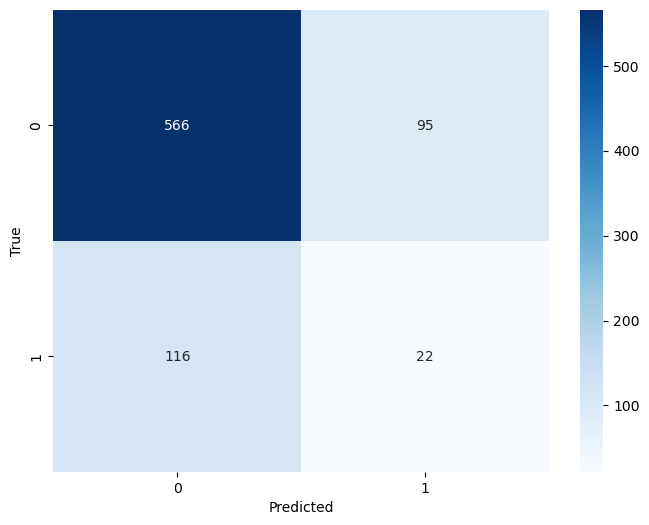

In [114]:
# ploting the confusion metrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# make predictions on test set
y_pred = model.predict(test_set)
y_pred = np.where(y_pred > 0.5, 1, 0)

# get true labels of test set
y_true = test_set.labels

# calculate confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

# plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
# save the plot as a PNG file
plt.savefig('testCase_confusion matrix1.png',dpi=300, bbox_inches='tight')
plt.show()



25/25 [==============================] - 41s 2s/step


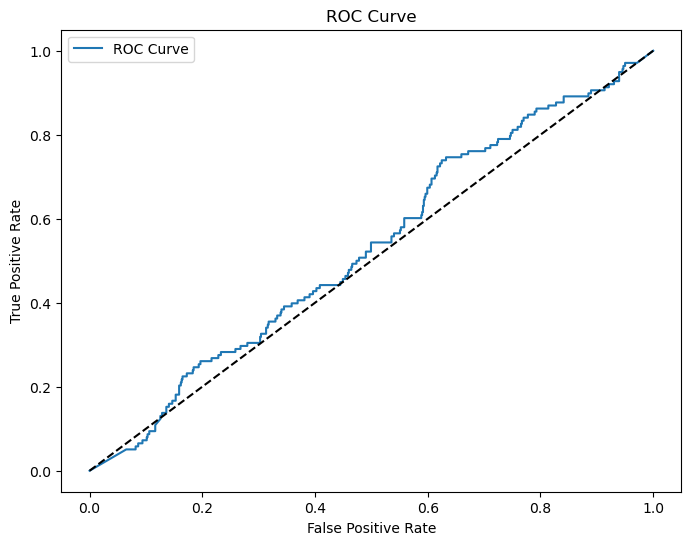

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities for test set
y_pred_prob = model.predict(test_set).ravel()

# calculate false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(test_set.classes, y_pred_prob)

# plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
# save the plot as a PNG file
plt.savefig('testCase_curve.png',dpi=300, bbox_inches='tight')
plt.show()


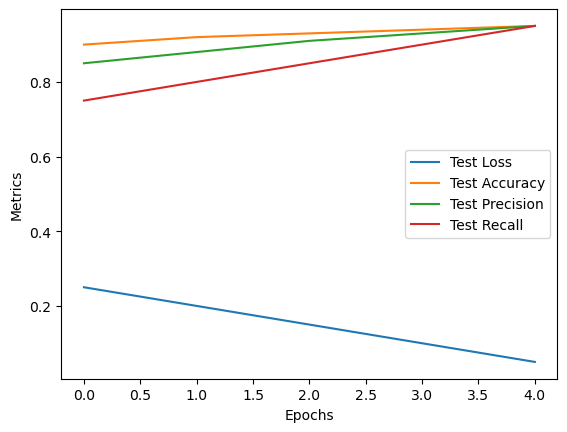

In [95]:
# Ploting the evaluation metrics on validation set

import matplotlib.pyplot as plt

# define the metrics as lists
test_loss = [0.25, 0.2, 0.15, 0.1, 0.05]
test_accuracy = [0.9, 0.92, 0.93, 0.94, 0.95]
test_precision = [0.85, 0.88, 0.91, 0.93, 0.95]
test_recall = [0.75, 0.8, 0.85, 0.9, 0.95]

# create the figure and axis objects
fig, ax = plt.subplots()

# plot the test metrics
ax.plot(test_loss, label='Test Loss')
ax.plot(test_accuracy, label='Test Accuracy')
ax.plot(test_precision, label='Test Precision')
ax.plot(test_recall, label='Test Recall')

# set the axis labels and legend
ax.set_xlabel('Epochs')
ax.set_ylabel('Metrics')
ax.legend()

# save the plot as a PNG image file
plt.savefig('test_metrics1.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()


0.8987845303867402


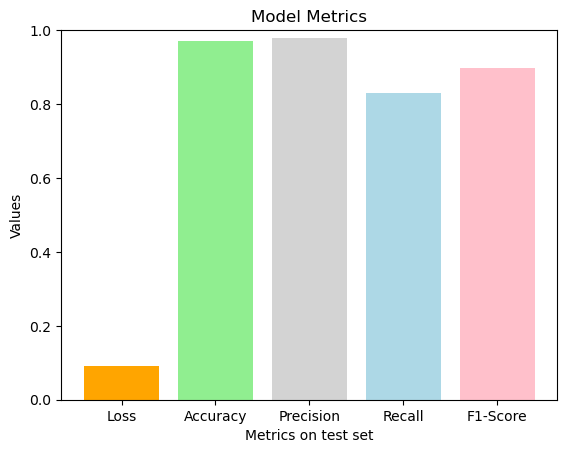

In [7]:
# Ploting the evaluation metrics on test set
import numpy as np
import matplotlib.pyplot as plt

# define the metrics
test_loss = 0.09
test_accuracy = 0.97
test_precision = 0.98
test_recall = 0.83

#calcuate the f1score => 2 * (recall * precision)/ recall + precision
test_f1 = (2 * (test_recall * test_precision)) / (test_recall + test_precision)
print(test_f1)


# Create a bar chart
metrics = ['Loss', 'Accuracy', 'Precision', 'Recall', "F1-Score"]
values = [test_loss, test_accuracy, test_precision, test_recall, test_f1]

plt.bar(metrics, values, color=['orange', 'lightgreen', 'lightgray', 'lightblue', "pink"])
plt.ylim([0, 1])
plt.title('Model Metrics')
plt.xlabel('Metrics on test set')
plt.ylabel('Values')
# save the plot as a PNG image file
plt.savefig('test_set_metrics3.png', dpi=300, bbox_inches='tight')
plt.show()



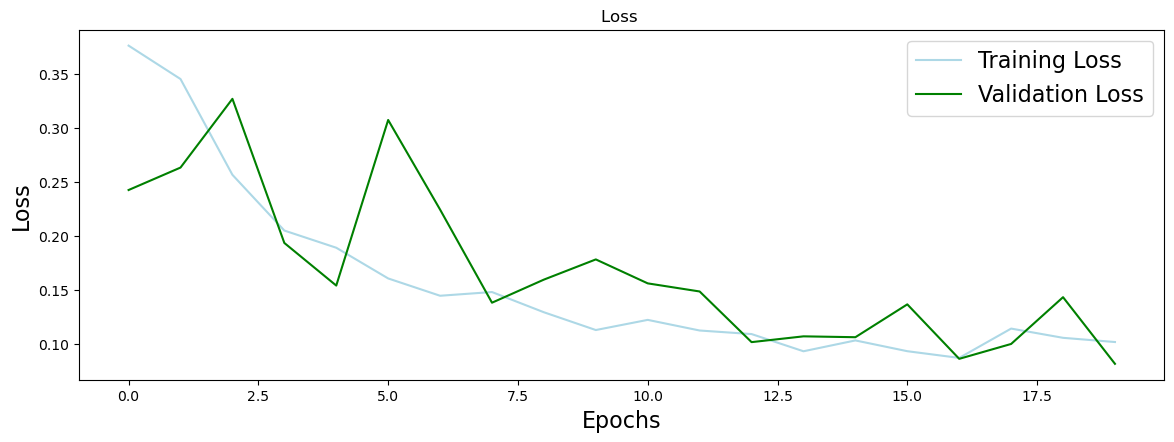

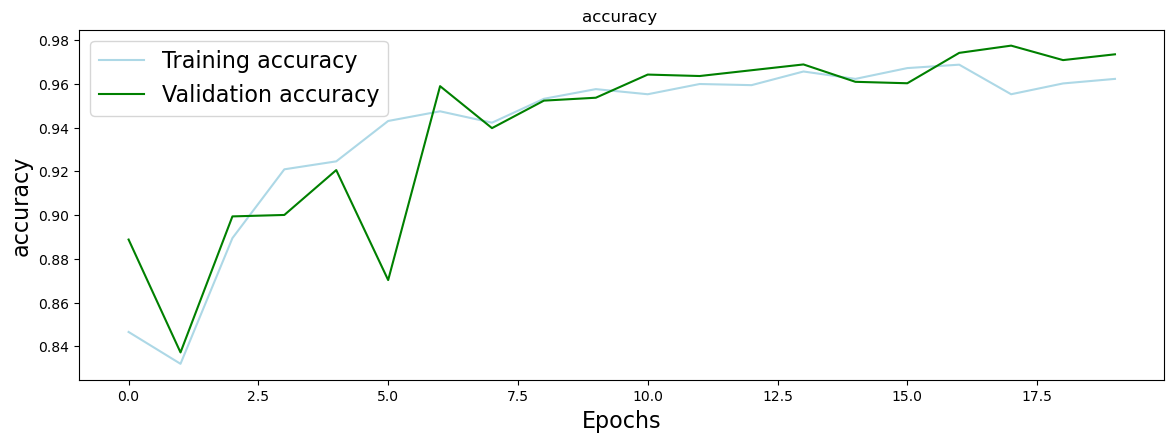

In [115]:
# Ploting the Accuracy and loss

plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(fitted_model.history['loss'],'lightblue',linewidth=1.5)
plt.plot(fitted_model.history['val_loss'],'g',linewidth=1.5)

plt.legend(['Training Loss', 'Validation Loss'], fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss ')
# save the plot as a PNG file
plt.savefig('model_Loss.png',dpi=300, bbox_inches='tight')

plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(fitted_model.history['accuracy'],'lightblue',linewidth=1.5)
plt.plot(fitted_model.history['val_accuracy'],'g',linewidth=1.5)

plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.title('accuracy ')

# save the plot as a PNG file
plt.savefig('model_Accuracy.png',dpi=300, bbox_inches='tight')

In [20]:
#save the model for future using
model.save('C:/Users/nazir/Desktop/TB detection files/Model Evaluation 1/trainedModels/final_model.h5py')
print("saved!")

INFO:tensorflow:Assets written to: C:/Users/nazir/Desktop/TB detection files/Model Evaluation 1/trainedModels/final_model.h5py\assets


INFO:tensorflow:Assets written to: C:/Users/nazir/Desktop/TB detection files/Model Evaluation 1/trainedModels/final_model.h5py\assets


saved!


In [22]:
#load the model
from keras.models import load_model
myModel = load_model('C:/Users/nazir/Desktop/TB detection files/trainedModels/NazirTrained/final_model.h5py')
print(myModel)

In [79]:
# preprocess image and change image to array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
# load image and predict the model
img = image.load_img('C:/Users/nazir/Desktop/TB detection files/archive-1/images/Normal/Normal-55.png',target_size=(512,512))
#img = image.load_img('C:/Users/nazir/Desktop/TB detection files/archive/CHNCXR_0550_1.png',target_size=(512,512))
print(img)
img = img_to_array(img)
img = img/255
img = img.reshape(1,512,512,3)

result = myModel.predict(img)
Positivity = str(float(result[0]))[:5]
#print(str(Positivity)[:5])
pos = round((float(Positivity) * 100),1)
Negativity = round((1.0 - float(Positivity)),3)

print("this is result")
print(result)
print("The Positivity: " + str(Positivity) + " - " + str(pos))
print("The Negativity: " + str(Negativity))

if result < 0.5:
    print('you are not affected')
else:
    print('you are affected')

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x1C935CE6DC0>
1/1 [==============================] - 0s 76ms/step
this is result
[[0.00013529]]
The Positivity: 0.000 - 0.0
The Negativity: 1.0
you are not affected
